#Moving Average

In [ ]:
!wget https://drive.google.com/uc?id=1i5MiyFxVU4uiu6MJ_aSSeCtnEXkfv0wc -O googl_close.csv

--2022-10-27 11:35:38--  https://drive.google.com/uc?id=1i5MiyFxVU4uiu6MJ_aSSeCtnEXkfv0wc
Resolving drive.google.com (drive.google.com)... 142.251.6.102, 142.251.6.139, 142.251.6.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7eso9v1avl8c15toinrepu2mdqrh54ge/1666870500000/10800959494545164832/*/1i5MiyFxVU4uiu6MJ_aSSeCtnEXkfv0wc?uuid=6c571a0b-9ac3-41a5-96e0-0e899a3fe4a4 [following]
--2022-10-27 11:35:38--  https://doc-0g-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7eso9v1avl8c15toinrepu2mdqrh54ge/1666870500000/10800959494545164832/*/1i5MiyFxVU4uiu6MJ_aSSeCtnEXkfv0wc?uuid=6c571a0b-9ac3-41a5-96e0-0e899a3fe4a4
Resolving doc-0g-2o-docs.googleusercontent.com (doc-0g-2o-docs.googleusercontent.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to doc-0g-2o

In [ ]:
import pandas as pd
df = pd.read_csv("googl_close.csv", parse_dates=['Date'])
df.head()


,Date,Close
0,2004-08-19,2.511011
1,2004-08-20,2.710460
2,2004-08-23,2.737738
3,2004-08-24,2.624374
4,2004-08-25,2.652653


##2.2

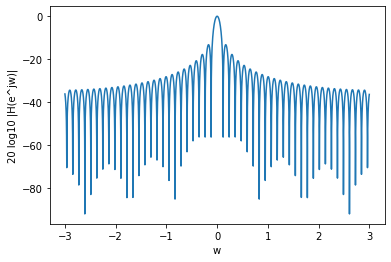

In [ ]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
n = df.shape[0]
N = 26
x = df['Close'].to_numpy()
w = np.arange(-3, 3, 6/n)
H_freq = (1/(2*N+1))*np.sin(w*(2*N+1)/2)/np.sin(w/2)
plt.plot(w, 20*np.log10(np.abs(H_freq)))
plt.ylabel('20 log10 |H(e^jw)|')
plt.xlabel('w')
plt.show()

##2.3

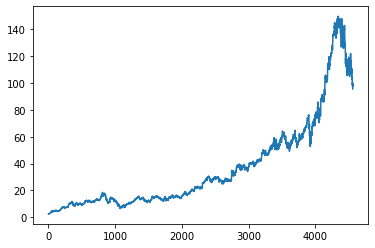

In [ ]:
plt.plot(np.arange(n), x)
plt.show()

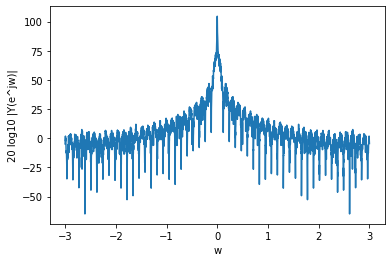

In [ ]:
X_freq = fftpack.fft(x)
X_freq_shift = np.zeros(n)
X_freq_shift = np.roll(X_freq,n//2)
Y_freq = X_freq_shift * H_freq
plt.plot(w, 20*np.log10(np.abs(Y_freq)))
plt.ylabel('20 log10 |Y(e^jw)|')
plt.xlabel('w')
plt.show()

##2.4

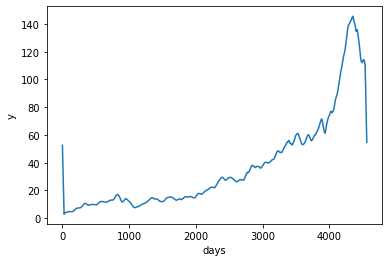

In [ ]:
y = fftpack.ifft(Y_freq)
plt.plot(np.arange(n), np.abs(y))
plt.xlabel('days')
plt.ylabel('y')
plt.show()